<ipython-input-47-955f7856bb06>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= lastgraph.index, y= 'Score', data= lastgraph, palette= 'pastel')


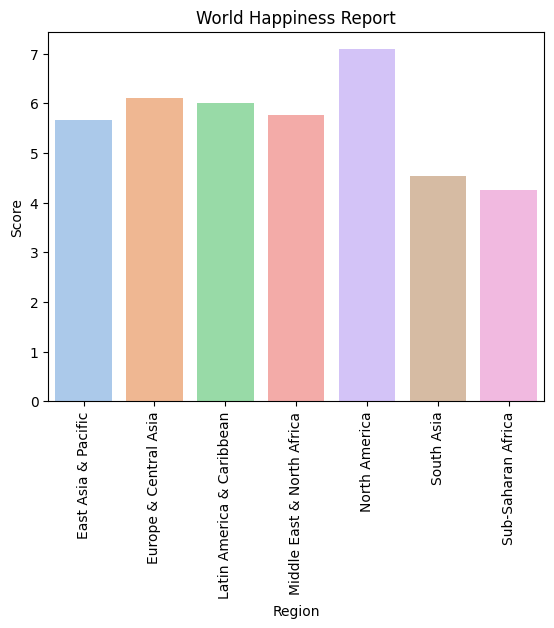

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#2 Guardar en un dataframe llamado happiness los registros del archivo Happiness_report.csv
happiness= pd.read_csv('/content/drive/MyDrive/Colab/ITESM Data Scientist/RETOS/VISUALIZACION DE DATOS CON PYTHON/Happiness_report.csv')

happiness



#3 A partir del dataframe happiness obtener otro dataframe llamado mexico donde unicamente se almacene la
#informacion de Mexico. Hacer que quede como indice la columna llamada Country or region
mexico= happiness.loc[happiness['Country or region']== 'Mexico', :]
mexico.set_index('Country or region', inplace= True)

mexico



#4 Obtener un histograma del puntaje (score) para identificar el rango o clase mas frecuente.
#Ubicar el valor de Mexico con una etiqueta de texto como en la figura proporcionada.
happiness['Score'].plot.hist(color= 'green')
plt.title('World Happiness Report')
plt.xlabel('Score')

valuescoremex= happiness.loc[happiness['Country or region']== 'Mexico', 'Score']
props_bbox= {'boxstyle': 'circle',
             'facecolor': 'red',
             'edgecolor': 'black',
             'alpha': 0.3}
plt.text(valuescoremex, 0, 'MEX', color= 'white', bbox= props_bbox)
plt.show()



#5 Construir un boxplot para la columna esperanza de vida (Healthy life expectancy).
#Ubicar el valor de Mexico con una anotacion tal como en la figura proporcionada
happiness['Healthy life expectancy'].plot.box()
plt.title('World Happiness Report')

valuemex= happiness.loc[happiness['Country or region']=='Mexico', 'Healthy life expectancy'].to_list()[0]
props_bbox= {'boxstyle': 'circle',
             'facecolor': 'red',
             'alpha': 0.3}
plt.annotate('MEX', xy= (1, valuemex), xytext= (1.25, valuemex), arrowprops=dict(arrowstyle='->', color= 'black'),
             color= 'white', bbox= props_bbox)
plt.show()



#6 Crear una grafica circular para analizar en que medida los factores contribuyen a evaluar la felicidad en Mexico
mexicopie= mexico.drop(['Score', 'Overall rank'], axis= 1)
mexicopie= mexicopie.T
mexicopie.index.name= ''
mexicopie.columns= ['Factors']
mexicopie


fig= plt.figure(figsize= (10,5))

ax1= fig.add_subplot(121)
ax1.table(cellText= mexicopie.values, colLabels= mexicopie.columns, rowLabels= mexicopie.index,
          colWidths= [0.3, 0.3], loc= 'center')
ax1.axis('off')

ax2= fig.add_subplot(122)
sns.set_palette('husl')
ax2.pie('Factors', data= mexicopie, labels= mexicopie.index, autopct= '%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.show()



#7 Filtrar el dataframe para quedarse con 5 paises (el mas feliz, el menos feliz, Mexico y otros dos)
#y visualizar en una misma grafica los 6 factores como en la imagen mostrada
fivecountries= happiness.loc[(happiness['Score']== happiness['Score'].max()) |
                             (happiness['Score']== happiness['Score'].min()) |
                             (happiness['Country or region']== 'Mexico') |
                             (happiness['Country or region']== 'United States') |
                             (happiness['Country or region']== 'Canada')]

fivecountries= fivecountries.drop(['Overall rank', 'Score'], axis= 1)

fivecountries.set_index('Country or region', inplace= True)

fivecountries= fivecountries.T

sns.set_palette('pastel')
fivecountries.plot(kind= 'bar', title= 'World Happiness Report')
plt.show()



#8 Crear una matriz de subgraficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores
#para determinar qué factor influye más en la evaluación
fig= plt.figure(figsize= (12, 6))
fig.suptitle('Contribution in happiness score')

ax1= fig.add_subplot(231)
ax1.scatter(x= happiness['Score'], y= happiness['GDP per capita'])
#x1.set_xlabel('Score')
ax1.set_ylabel('GDP per capita')

ax2= fig.add_subplot(232)
ax2.scatter(x= happiness['Score'], y= happiness['Social support'])
ax2.set_xlabel('Score')
ax2.set_ylabel('Social support')

ax3= fig.add_subplot(233)
ax3.scatter(x= happiness['Score'], y= happiness['Healthy life expectancy'])
ax3.set_xlabel('Score')
ax3.set_ylabel('Healthy life expectancy')

ax4= fig.add_subplot(234)
ax4.scatter(x= happiness['Score'], y= happiness['Freedom to make life choices'])
ax4.set_xlabel('Score')
ax4.set_ylabel('Freedom to make life choices')

ax5= fig.add_subplot(235)
ax5.scatter(x= happiness['Score'], y= happiness['Generosity'])
ax5.set_xlabel('Score')
ax5.set_ylabel('Generosity')

ax6= fig.add_subplot(236)
ax6.scatter(x= happiness['Score'], y= happiness['Perceptions of corruption'])
ax6.set_xlabel('Score')
ax6.set_ylabel('Perceptions of corruption')

plt.show()



#Comprobar las subgraficas anteriores con un heatmap donde se incluyan los indices de correlación como
#en la figura mostrada
map= happiness.drop(['Country or region'], axis= 1)

sns.heatmap(round(map.corr(), 2), annot= True)



#9 Combinar con el dataframe metadata (metadata.csv) para graficar la felicidad promedio por region
metadata= pd.read_csv('/content/drive/MyDrive/Colab/ITESM Data Scientist/RETOS/VISUALIZACION DE DATOS CON PYTHON/Metadata.csv')

both= happiness.merge(metadata, left_on= 'Country or region', right_on= 'TableName')

lastgraph= both[['Region', 'Score']].groupby('Region').mean()

sns.barplot(x= lastgraph.index, y= 'Score', data= lastgraph, palette= 'pastel')

plt.title('World Happiness Report')

plt.xticks(rotation= 90)

plt.show()
